In [1]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.datasets import mnist

import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

import tensorflow as tf

import random

2022-09-15 19:08:03.519244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-15 19:08:04.119473: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-15 19:08:05.336278: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/mart1an/anaconda3/envs/tf/lib/
2022-09-15 19:08:05.336388: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugi

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

3


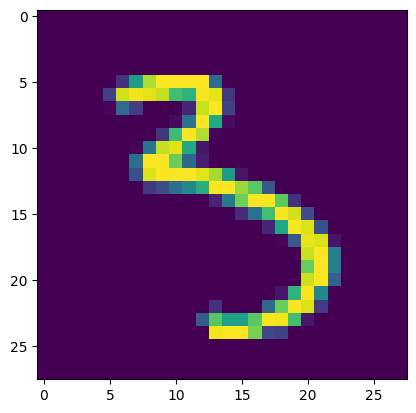

In [3]:
# Display a random element of the dataset
element = random.randint(0, len(x_train) - 1)

print(y_train[element])


plt.imshow(x_train[element])
plt.show()

In [4]:
# Reshape the dataset
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))


# Normalize the data set
max = x_train.max()

x_train = x_train / max
x_test = x_test / max

In [5]:
# Generate one hot encoding for the y
categories = y_train.max() - y_train.min() + 1

y_train = np.eye(categories)[y_train]
y_test = np.eye(categories)[y_test]

In [6]:
# Define the model
model = keras.Sequential(
    [
        # Input
        layers.Input(28 * 28),

        # Hidden
        layers.Dense(28 * 28, activation="relu"),
        layers.Dense(20, activation="relu"),
        layers.Dense(20, activation="relu"),

        # Output
        layers.Dense(categories, activation="softmax")
    ]
)


# Compile the model
learning_rate = 0.01

model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

2022-09-15 19:08:07.618398: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 19:08:07.671987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 19:08:07.672398: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-15 19:08:07.673563: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [7]:
# Train the model
batch_size = 32
epochs = 10

model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3305 - accuracy: 0.9053
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1830 - accuracy: 0.9531
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1565 - accuracy: 0.9601
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1430 - accuracy: 0.9643
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1294 - accuracy: 0.9698
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1254 - accuracy: 0.9700
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1151 - accuracy: 0.9732
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1147 - accuracy: 0.9746
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1020 - accuracy: 0.9765
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.107

In [8]:
# Test the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1500 - accuracy: 0.9690


[0.15001662075519562, 0.968999981880188]

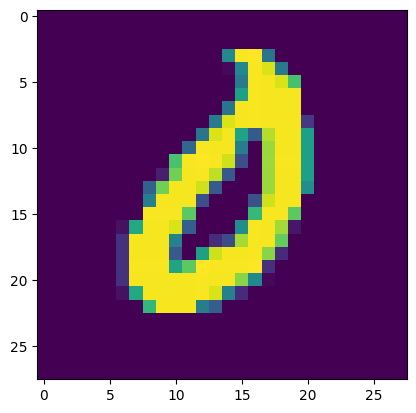

1/1 [==============================] - 0s 67ms/step
element: 7558
prediction: 0
real value: 0


In [9]:
# Make predictions on a random element
element = random.randint(0, len(y_test) - 1)

# Show the element
plt.imshow(x_test[element].reshape(28, 28))
plt.show()


# Predict the value
prediction = model.predict(x_test[element].reshape(1, 28 * 28)).reshape(-1)
real_value = y_test[element]


# Format the output
prediction_category = prediction.argmax()
real_value_category = real_value.argmax()


# Print the result
print(f"element: {element}")
print(f"prediction: {prediction_category}\nreal value: {real_value_category}")

In [10]:
# Test the model with a local image

# Load the image
image = imread("custom_image/test.png")

# Display the image
plt.imshow(image)
plt.show()


# Reshape to the input of the model
image_reshaped = image.reshape(1, -1)

# Predict the value
prediction = model.predict(image_reshaped).reshape(-1)


# Format the output
prediction_category = prediction.argmax()
certanty = prediction.max()


# Print the result
print(f"prediction: {prediction_category} - {np.format_float_positional(certanty * 100, precision=0)}")


FileNotFoundError: [Errno 2] No such file or directory: 'test_image/test.png'